In [1]:
# autoload
%load_ext autoreload
%autoreload 2
 
import pandas as pd
import sys
sys.path.append('../')

from process.tables import *

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_parquet('../data/raw/meds_omop_ehrshot/data/')

### Make Outcomes Table 

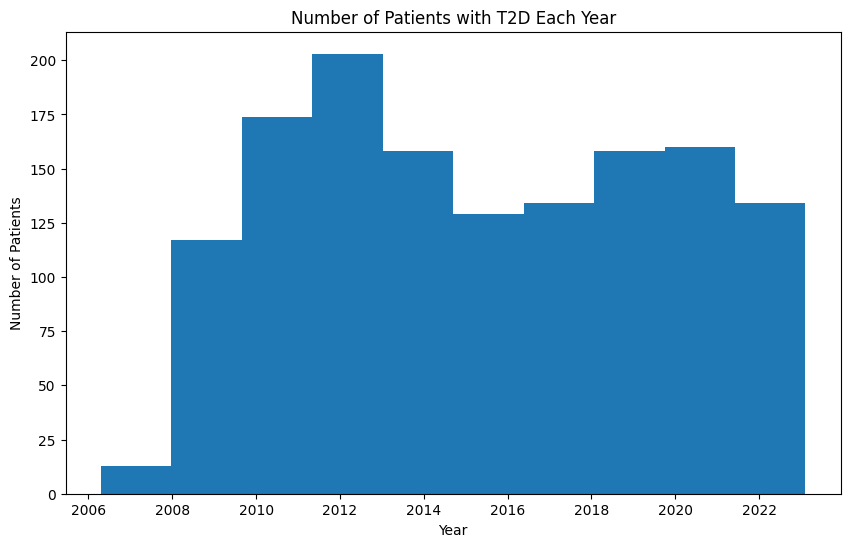

In [4]:
# Get mortality dates
mortality_df = pd.read_csv('../data/raw/tables_csv/death.csv')[['person_id', 'death_DATE']].rename(columns={'death_DATE': 'mortality_date', 'person_id': 'subject_id'})

# Get censorship dates
censored_df = make_censorship_df(raw_df)
censored_df = censorship_algo(censored_df)

diseases = ['t2d', 'ckd', 'osteo', 'mace', 'af', 'hypertension', 'hyperlipidemia', 'nafld|nash']
disease_dfs = []

# Get disease onset dates
for disease in diseases:
    df = disease_onset_table(raw_df, disease)
    df = df.rename(columns={'time': f'{disease}_date'})
    disease_dfs.append(df)

disease_df = reduce(lambda left, right: pd.merge(left, right, on='subject_id', how='outer'), disease_dfs)

# Merge all dataframes
outcomes = disease_df.merge(censored_df, on='subject_id', how='outer').merge(mortality_df, on='subject_id', how='outer')
# save the outcomes dataframe
outcomes.to_csv('../data/processed/outcomes_df.csv')

# plot the number of patients with the disease each year
plt.figure(figsize=(10, 6))
plt.hist(outcomes['t2d_date'])
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with T2D Each Year')
plt.show()

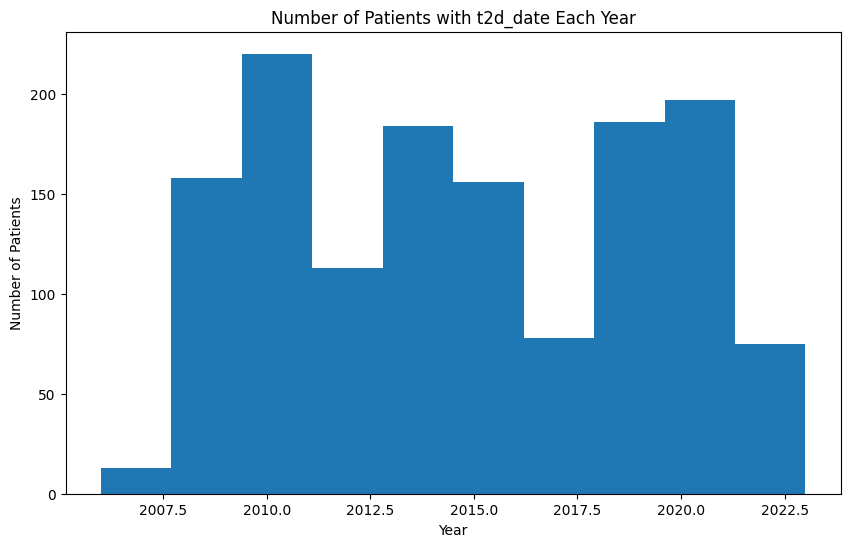

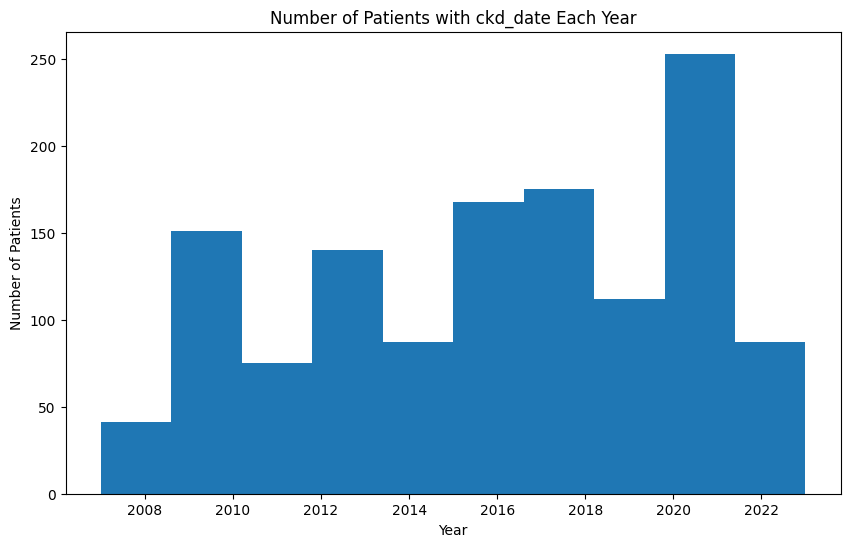

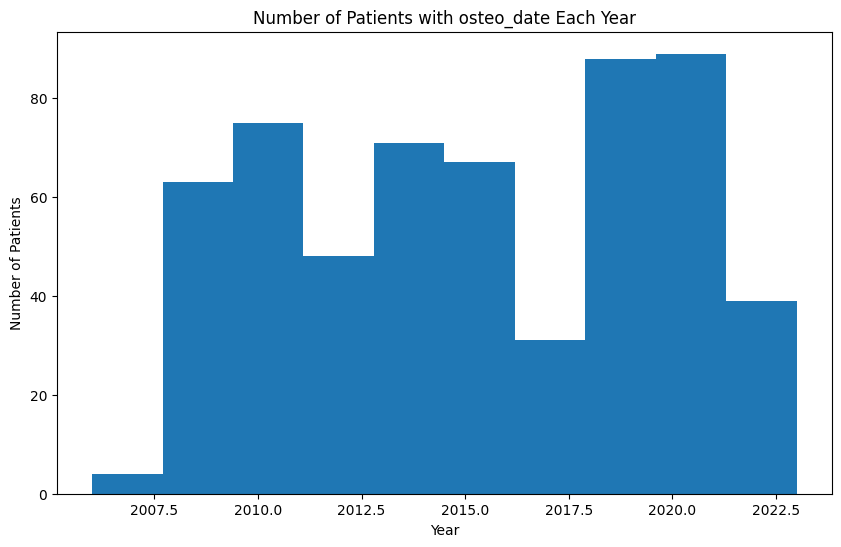

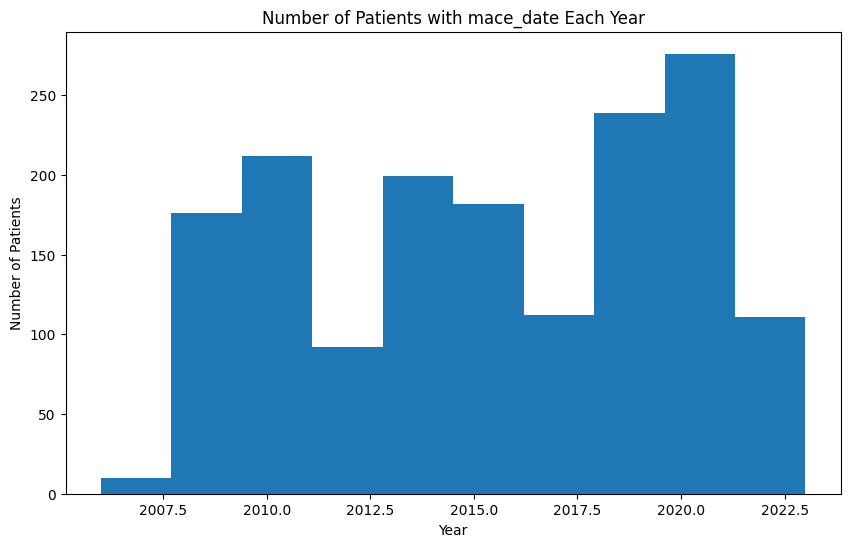

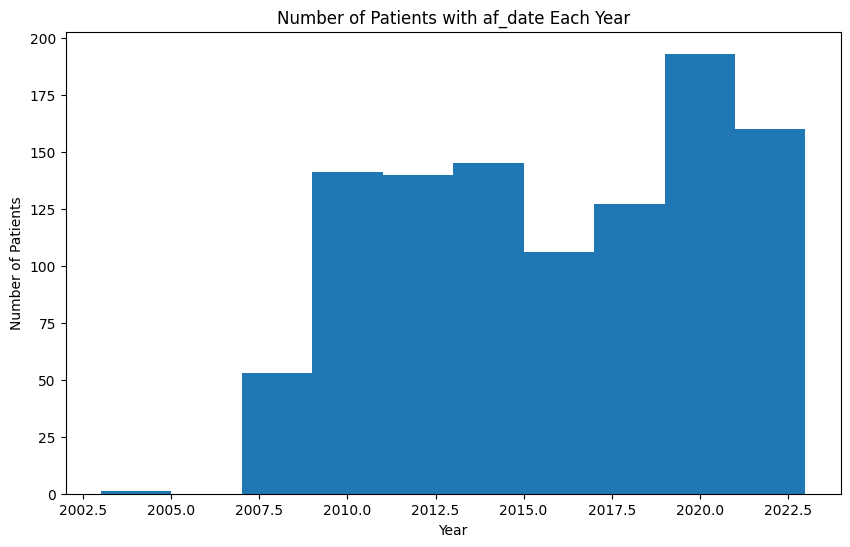

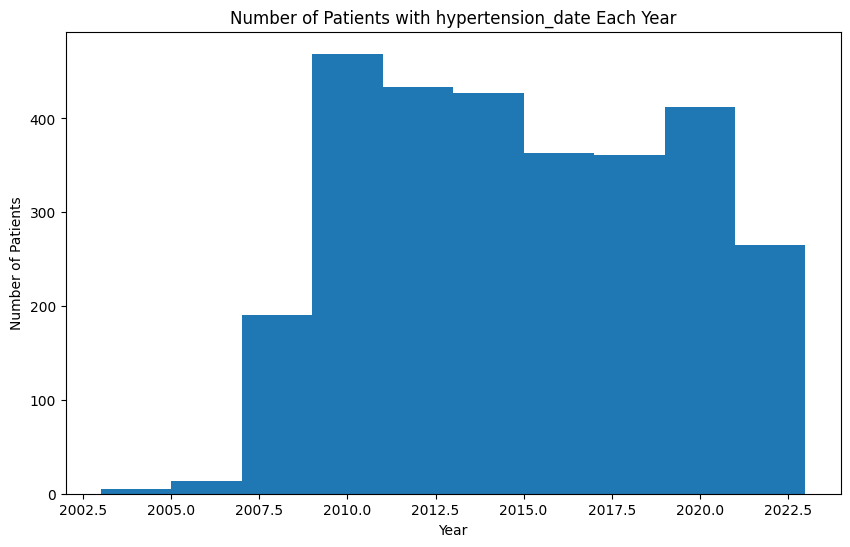

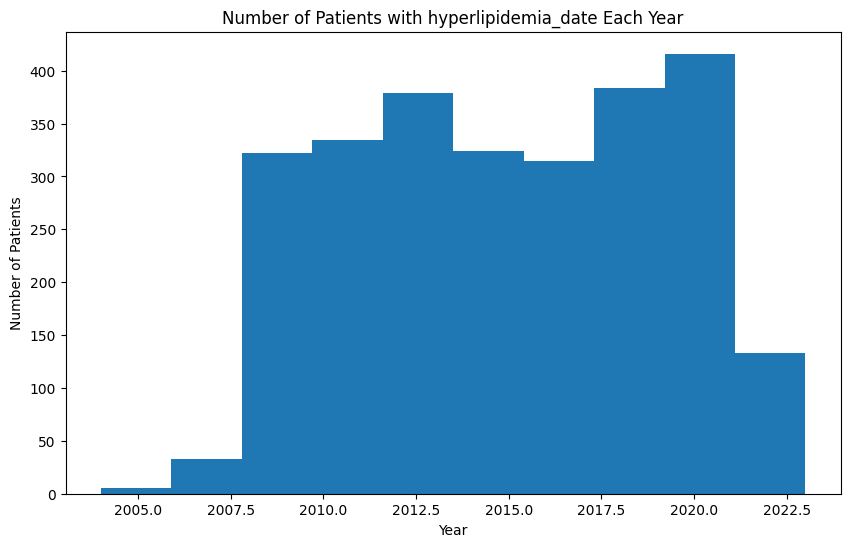

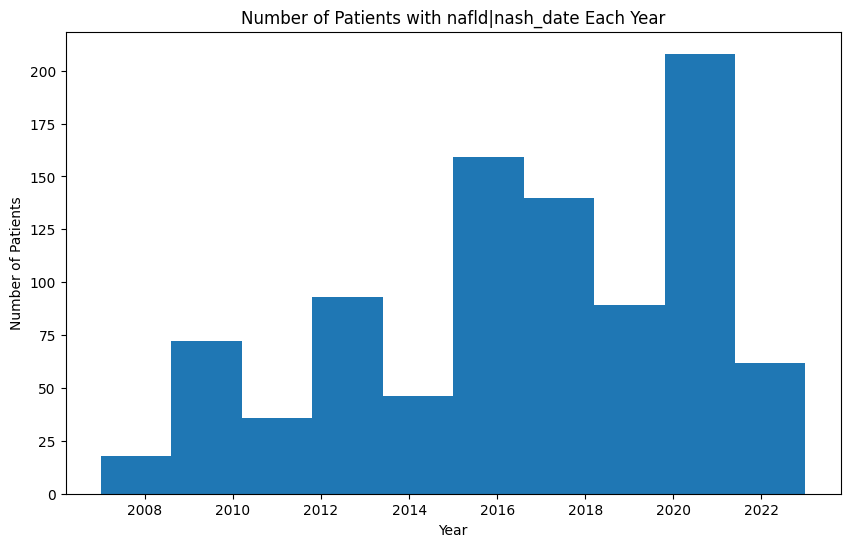

In [5]:
# each disease column has a date of onset. plot the number of patients with the disease each year. print the total number of patients with the disease.

# get the disease onset dates
disease_onset_dates = disease_df.drop(columns=['subject_id'])
for disease in disease_onset_dates.columns:
    # print the disease name and the number of patients with the disease
    
    # convert the date to year
    disease_onset_dates[disease] = disease_onset_dates[disease].dt.year


    # plot the number of patients with the disease each year
    plt.figure(figsize=(10, 6))
    plt.hist(disease_onset_dates[disease])
    plt.xlabel('Year')
    plt.ylabel('Number of Patients')
    plt.title(f'Number of Patients with {disease} Each Year')
    plt.show()